In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import cv2

# Toggle between grayscale and RGB input
use_rgb = True
image_size = (64, 64)
input_channels = 3 if use_rgb else 1
input_size = image_size[0] * image_size[1] * input_channels

# Load images and labels
def load_images_from_folder(folder, label, use_rgb):
    images = []
    labels = []
    for filename in os.listdir(folder):
        flag = cv2.IMREAD_COLOR if use_rgb else cv2.IMREAD_GRAYSCALE
        img = cv2.imread(os.path.join(folder, filename), flag)
        if img is not None:
            img = cv2.resize(img, image_size)
            if use_rgb:
                img = img.transpose((2, 0, 1)).reshape(-1)  # HWC to CHW then flatten
            else:
                img = img.flatten()
            img = img / 255.0  # Normalize to [0, 1]
            images.append(img)
            labels.append(label)
    return images, labels

pleasant_images, pleasant_labels = load_images_from_folder('train-images/train/pleasant', 1, use_rgb)
unpleasant_images, unpleasant_labels = load_images_from_folder('train-images/train/unpleasant', 0, use_rgb)

X = np.array(pleasant_images + unpleasant_images, dtype=np.float32)
y = np.array(pleasant_labels + unpleasant_labels, dtype=np.int64)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest: Trees=50, Max Depth=None
Accuracy: 0.8338557993730408
Precision: 0.8854337152209493
Recall: 0.7920937042459737
F1 Score: 0.8361669242658424
Confusion Matrix:
 [[523  70]
 [142 541]]
Random Forest: Trees=100, Max Depth=10
Accuracy: 0.841692789968652
Precision: 0.8988391376451078
Recall: 0.7935578330893118
F1 Score: 0.8429237947122862
Confusion Matrix:
 [[532  61]
 [141 542]]
Random Forest: Trees=200, Max Depth=20
Accuracy: 0.8565830721003135
Precision: 0.9006410256410257
Recall: 0.8228404099560761
F1 Score: 0.8599846977811783
Confusion Matrix:
 [[531  62]
 [121 562]]


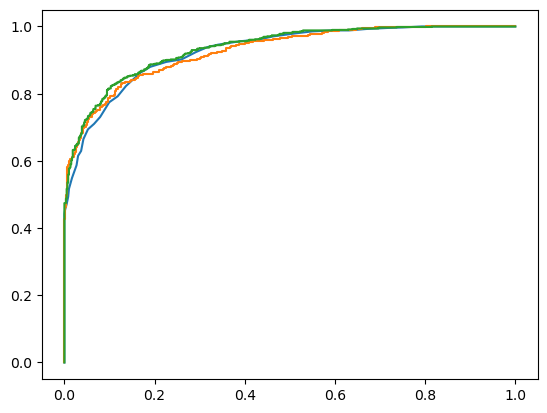

In [2]:
# -------------------------
# Random Forest Evaluation
# -------------------------
rf_params = [(50, None), (100, 10), (200, 20)]
for n_estimators, max_depth in rf_params:
    print(f"Random Forest: Trees={n_estimators}, Max Depth={max_depth}")
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    y_proba = clf.predict_proba(X_val)[:, 1]

    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred))
    print("Recall:", recall_score(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

    fpr, tpr, _ = roc_curve(y_val, y_proba)
    plt.plot(fpr, tpr, label=f'RF {n_estimators} trees')


Bagging with Linear SVM:
Accuracy: 0.8393416927899686
Precision: 0.8610271903323263
Recall: 0.8345534407027818
F1 Score: 0.8475836431226765
Confusion Matrix:
 [[501  92]
 [113 570]]


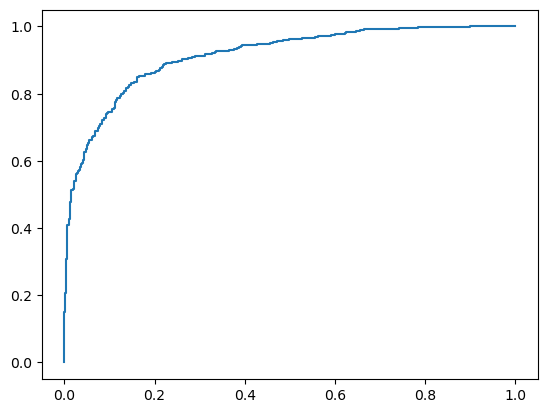

In [11]:
# -------------------------
# Bagging with Linear SVM
# -------------------------
bagging = BaggingClassifier(estimator=SVC(kernel='linear', probability=True),
                            n_estimators=20, random_state=42)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_val)
y_proba = bagging.predict_proba(X_val)[:, 1]
print("\nBagging with Linear SVM:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label='Bagging SVM')

In [15]:
# -------------------------
# AdaBoost with Decision Tree
# -------------------------
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                              n_estimators=200, random_state=42)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_val)
y_proba = adaboost.predict_proba(X_val)[:, 1]
print("\nAdaBoost with Decision Tree:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label='AdaBoost DT')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Ensemble Models')
plt.legend()
plt.show()

C:\Users\legou\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


KeyboardInterrupt: 

C:\Users\legou\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost with Decision Tree:
Accuracy: 0.8463949843260188
Precision: 0.8717557251908397
Recall: 0.83601756954612
F1 Score: 0.8535127055306427
Confusion Matrix:
 [[509  84]
 [112 571]]


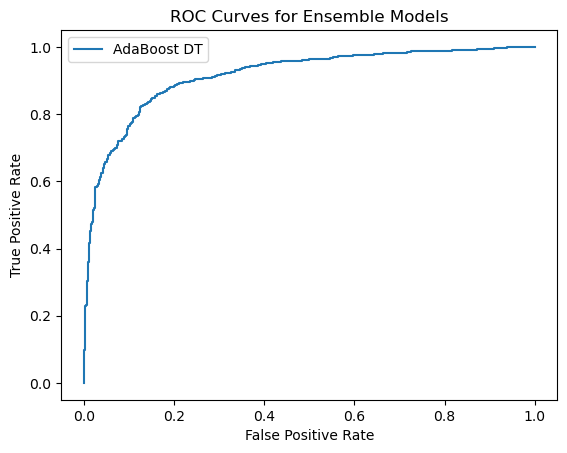

In [5]:
# Choose final model - Example: Random Forest with 100 trees, max depth 10
final_model = AdaBoostClassifier(estimator=clf, n_estimators=10, random_state=42)
final_model.fit(X_train, y_train)

print("\nAdaBoost with Decision Tree:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label='AdaBoost DT')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Ensemble Models')
plt.legend()
plt.show()

In [ ]:
# Predict test set
test_df = pd.read_csv('Test-IDs.csv')
submission = []

for _, row in test_df.iterrows():
    img_path = os.path.join('TEST_images/TEST_images', row['Filename'])
    flag = cv2.IMREAD_COLOR if use_rgb else cv2.IMREAD_GRAYSCALE
    img = cv2.imread(img_path, flag)
    if img is not None:
        img = cv2.resize(img, image_size)
        if use_rgb:
            img = img.transpose((2, 0, 1)).reshape(-1)
        else:
            img = img.flatten()
        img = img / 255.0
        pred = adaboost.predict([img])[0]
        submission.append({'ID': row['ID'], 'LABEL': int(pred)})

submission_df = pd.DataFrame(submission)
submission_df.to_csv('submission.csv', index=False)
print("Submission file saved with ensemble classifier predictions.")